In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline

In [114]:
#list_of_tickers = ["MJ", 'SPY']
#end_date= datetime.now()
#start_date= end_date + timedelta(-365)
#tickers_df= get_historical_data(list_of_tickers, start_date, end_date, output_format="pandas", columns='close')
#tickers_df.head()

In [115]:
#read aggregate data csv
aggregate_df= pd.read_csv("aggregate_data.csv")
aggregate_df.set_index(pd.to_datetime(aggregate_df['date'], infer_datetime_format=True), inplace=True)
aggregate_df.drop(columns=['date'], inplace=True)
agg_df_asc= aggregate_df.sort_index(ascending= True)
agg_df_asc.head()

BOOZ   SMOK      MJ    XBI    XPH     SPY
date                                                   
2016-09-19   98.87  83.69  29.457  65.89  46.00  213.41
2016-09-20   99.61  84.02  29.457  67.51  46.12  213.42
2016-09-21  101.36  85.08  29.457  68.28  46.27  215.82
2016-09-22  102.83  85.97  30.460  68.83  46.56  217.18
2016-09-23  102.85  85.75  30.170  68.14  46.91  215.99

In [116]:
#tickers_df.to_csv("MJ_index_data")

In [117]:
#tickers_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
#tickers_df.head()

In [118]:
#calculate 2 year returns for indexes and drop nulls
df_daily_returns = agg_df_asc.pct_change().dropna()
df_daily_returns.head()

BOOZ      SMOK        MJ       XBI       XPH       SPY
date                                                                  
2016-09-20  0.007485  0.003943  0.000000  0.024586  0.002609  0.000047
2016-09-21  0.017569  0.012616  0.000000  0.011406  0.003252  0.011245
2016-09-22  0.014503  0.010461  0.034050  0.008055  0.006268  0.006302
2016-09-23  0.000194 -0.002559 -0.009521 -0.010025  0.007517 -0.005479
2016-09-26  0.000194 -0.020292  0.000000 -0.005430 -0.026220 -0.008102

In [119]:
# Calculate Sharpe Ratio
sharpe_ratios = (df_daily_returns.mean() * 756) / (df_daily_returns.std() * np.sqrt(756))
sharpe_ratios

BOOZ    0.268030
SMOK   -0.768188
MJ      0.004573
XBI     0.711276
XPH    -0.416935
SPY     1.647644
dtype: float64

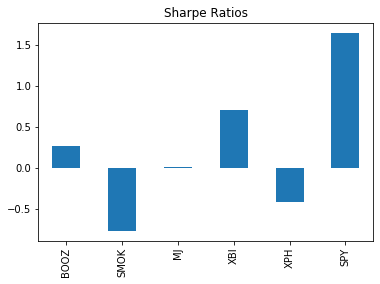

In [120]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

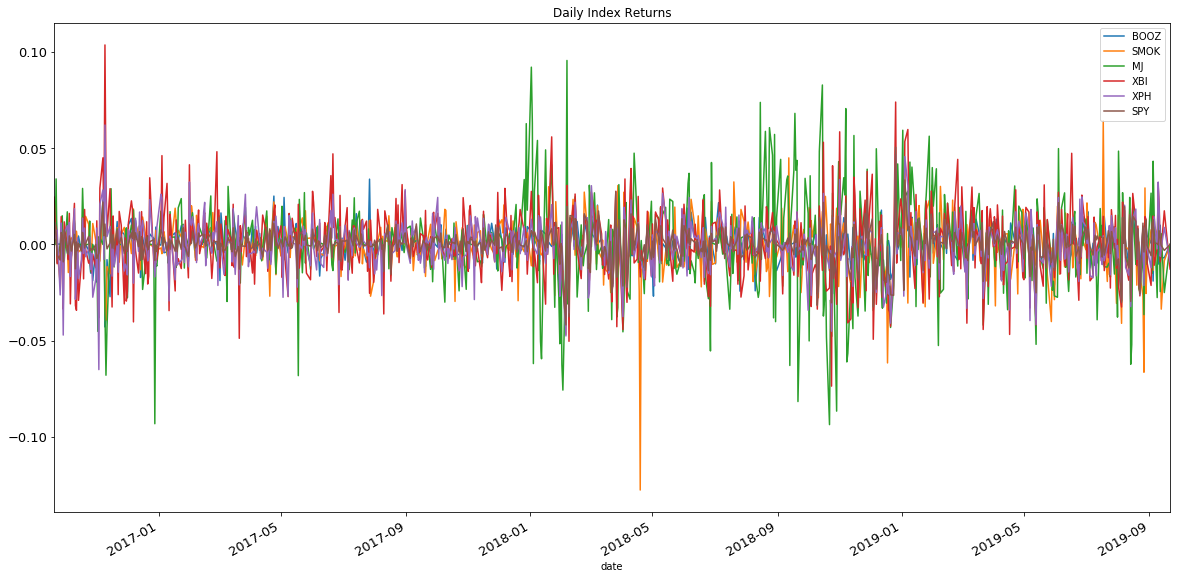

In [121]:
# Plot daily retuns for indexes
df_daily_returns.plot(figsize=(20,10), title= "Daily Index Returns", fontsize=13);

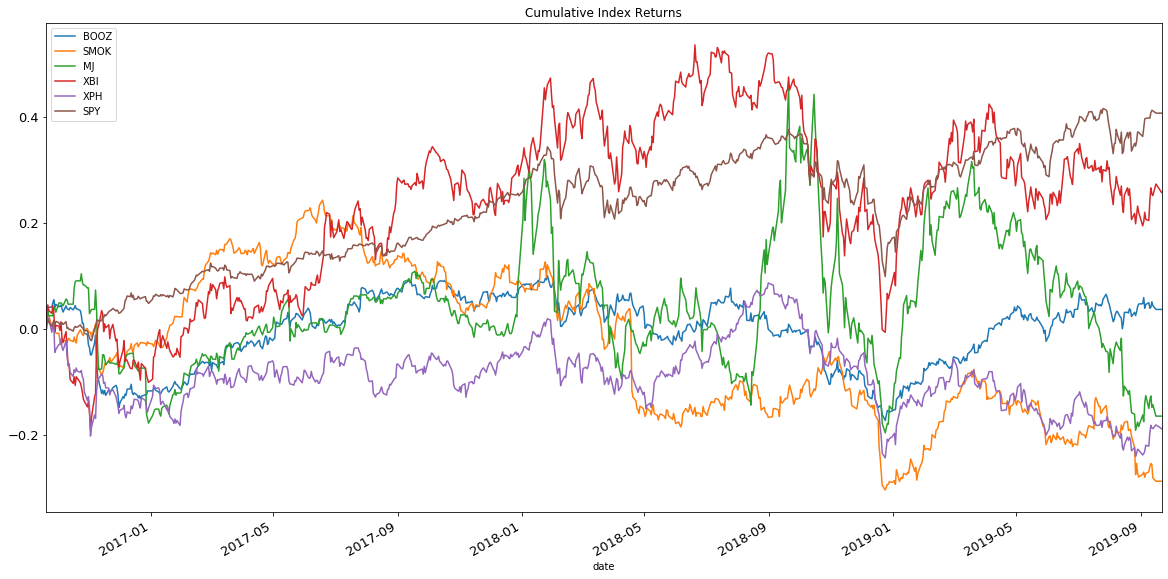

In [122]:
# Plot cumulative returns for the indexes
cumulative_returns_indexes = (1 + df_daily_returns).cumprod() - 1
cumulative_returns_indexes.plot(figsize=(20,10), title= "Cumulative Index Returns", fontsize=13);


In [123]:
#HV plot of cumulative returns
cumulative_returns_indexes.hvplot.line(ylabel= "cumulative returns", xlabel= "date")

:NdOverlay   [Variable]
   :Curve   [date]   (value)

# 20, 50, 100 day moving averages of MJ

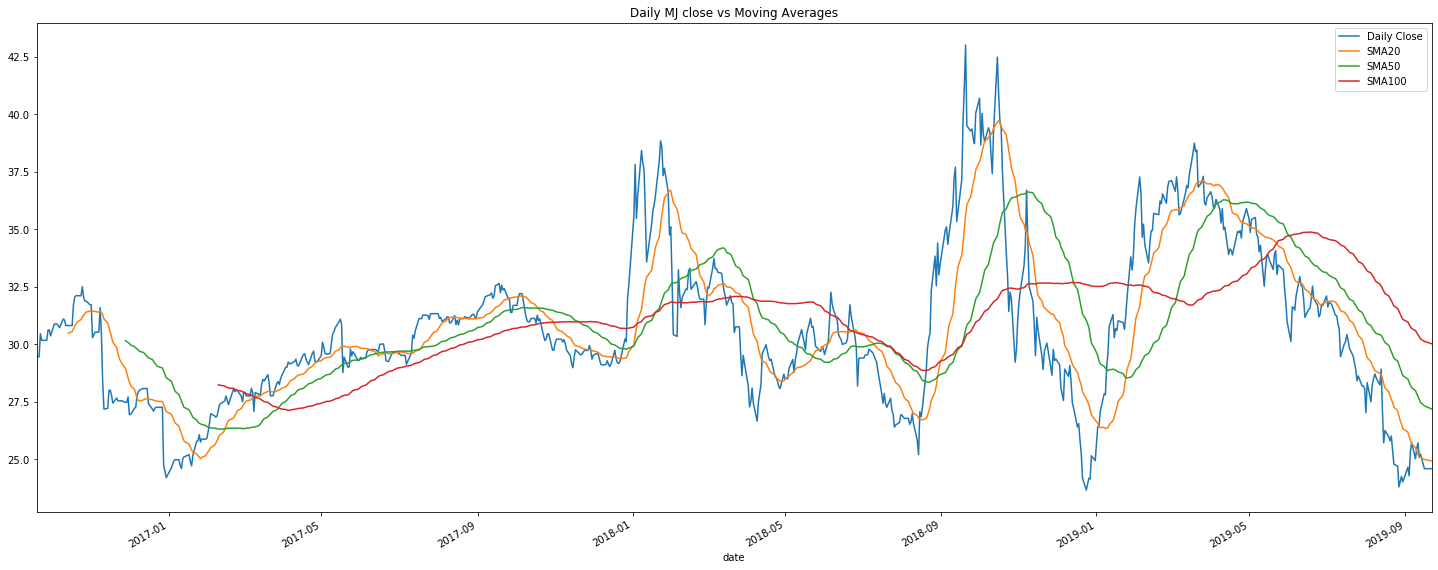

In [124]:
#20, 50,100 day SMA of MJ
mj_sma_20 = agg_df_asc["MJ"].rolling(window=20).mean()
mj_sma_50 = agg_df_asc["MJ"].rolling(window=50).mean()
mj_sma_100 = agg_df_asc["MJ"].rolling(window=100).mean()
axes = agg_df_asc['MJ'].plot(figsize=(25,10), title= "Daily MJ close vs Moving Averages")
mj_sma_20.plot(ax=axes)
mj_sma_50.plot(ax=axes)
mj_sma_100.plot(ax=axes)
axes.legend(["Daily Close", "SMA20", "SMA50", "SMA100"]);

In [125]:
# Daily Standard Deviations if indexes
# Calculate the standard deviation for each portfolio. 
indexes_daily_std= cumulative_returns_indexes.std()
indexes_daily_std.sort_values(ascending=False)

XBI     0.163155
SMOK    0.137695
MJ      0.117036
SPY     0.111516
BOOZ    0.063705
XPH     0.062148
dtype: float64

In [126]:
annualized_std_indexes = indexes_daily_std * np.sqrt(252)
annualized_std_indexes

BOOZ    1.011293
SMOK    2.185848
MJ      1.857890
XBI     2.590008
XPH     0.986565
SPY     1.770265
dtype: float64

In [127]:
correlation= agg_df_asc.corr()
correlation

BOOZ      SMOK        MJ       XBI       XPH       SPY
BOOZ  1.000000  0.305083  0.218449  0.453539  0.275505  0.318264
SMOK  0.305083  1.000000 -0.041690 -0.334894  0.279037 -0.562516
MJ    0.218449 -0.041690  1.000000  0.451009  0.414439  0.393592
XBI   0.453539 -0.334894  0.451009  1.000000  0.423882  0.831621
XPH   0.275505  0.279037  0.414439  0.423882  1.000000  0.073947
SPY   0.318264 -0.562516  0.393592  0.831621  0.073947  1.000000

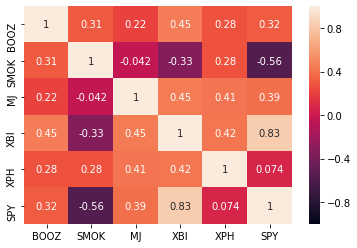

In [128]:
#Correlation heat map
import seaborn as sns
corr_all = agg_df_asc.corr()
sns.heatmap(corr_all, xticklabels=corr_all.columns.values, vmin=-1, vmax=1,
            yticklabels=corr_all.columns.values, annot= True)

In [129]:
#daily returns pct change
df_daily_returns.head()

BOOZ      SMOK        MJ       XBI       XPH       SPY
date                                                                  
2016-09-20  0.007485  0.003943  0.000000  0.024586  0.002609  0.000047
2016-09-21  0.017569  0.012616  0.000000  0.011406  0.003252  0.011245
2016-09-22  0.014503  0.010461  0.034050  0.008055  0.006268  0.006302
2016-09-23  0.000194 -0.002559 -0.009521 -0.010025  0.007517 -0.005479
2016-09-26  0.000194 -0.020292  0.000000 -0.005430 -0.026220 -0.008102

# Calculate Volatility

In [130]:
#annualized volatility
volatility = df_daily_returns.std() * np.sqrt(252)
volatility

BOOZ    0.141347
SMOK    0.207236
MJ      0.350061
XBI     0.283631
XPH     0.204419
SPY     0.128754
dtype: float64

In [131]:
#calculate average daily returns of each index
avg_daily_return_booz = df_daily_returns.mean()['BOOZ']
avg_daily_return_smok = df_daily_returns.mean()['SMOK']
avg_daily_return_mj = df_daily_returns.mean()['MJ']
avg_daily_return_xbi = df_daily_returns.mean()['XBI']
avg_daily_return_xph = df_daily_returns.mean()['XPH']
avg_daily_return_spy = df_daily_returns.mean()['SPY']
print("BOOZ average daily return is", avg_daily_return_booz)
print("SMOK average daily return is", avg_daily_return_smok)
print("MJ average daily return is", avg_daily_return_mj)
print("XBI average daily return is", avg_daily_return_xbi)
print("XPI average daily return is", avg_daily_return_xph)
print("SPY average daily return is", avg_daily_return_spy)

BOOZ average daily return is 8.679804971413078e-05
SMOK average daily return is -0.0003647300203599301
MJ average daily return is 3.66795916561003e-06
XBI average daily return is 0.0004622016905746064
XPI average daily return is -0.00019526748493822746
SPY average daily return is 0.00048603052609922916


In [132]:
#calculate daily std dev of indexes
std_dev_daily_return_booz = df_daily_returns.std()['BOOZ']
std_dev_daily_return_smok = df_daily_returns.std()['SMOK']
std_dev_daily_return_mj = df_daily_returns.std()['MJ']
std_dev_daily_return_xbi = df_daily_returns.std()['XBI']
std_dev_daily_return_xph = df_daily_returns.std()['XPH']
std_dev_daily_return_spy = df_daily_returns.std()['SPY']
print("BOOZ volatility is", std_dev_daily_return_booz)
print("SMOK volatility is", std_dev_daily_return_smok)
print("MJ volatility is", std_dev_daily_return_mj)
print("XBI volatility is", std_dev_daily_return_xbi)
print("XPH volatility is", std_dev_daily_return_xph)
print("SPY volatility is", std_dev_daily_return_spy)


BOOZ volatility is 0.008904031055788826
SMOK volatility is 0.013054637625755917
MJ volatility is 0.022051761164075038
XBI volatility is 0.017867101297148497
XPH volatility is 0.012877218060406787
SPY volatility is 0.008110748686137108


In [133]:
#show the final closigprices
booz_last_price = aggregate_df['BOOZ'][0]
smok_last_price = aggregate_df['SMOK'][0]
mj_last_price = aggregate_df['MJ'][0]
xbi_last_price = aggregate_df['XBI'][0]
xph_last_price = aggregate_df['XPH'][0]
spy_last_price = aggregate_df['SPY'][0]
print(booz_last_price)
print(smok_last_price)
print(mj_last_price)
print(xbi_last_price)
print(xph_last_price)
print(spy_last_price)

102.44
59.58
24.59
82.79
37.3
300.16


In [134]:
# Setup the Monte Carlo Parameters 500msimulations over 2 years
number_simulations = 2000
number_records = 252 * 2
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [135]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices = [mj_last_price]
    simulated_booz_prices = [booz_last_price]
    #simulated_smok_prices = [smok_last_price]
    
    # Simulate the returns
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_mj_price = simulated_mj_prices[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        simulated_booz_price = simulated_booz_prices[-1] * (1 + np.random.normal(avg_daily_return_booz, std_dev_daily_return_booz))
        #simulated_smok_price = simulated_smok_prices[-1] * (1 + np.random.normal(avg_daily_return_smok, std_dev_daily_return_smok))
       
        # Append the simulated price to the list
        simulated_mj_prices.append(simulated_mj_price)
        simulated_booz_prices.append(simulated_booz_price)
        #simulated_smok_prices.append(simulated_smok_price)
    
        
    monte_carlo["MJ prices"] = pd.Series(simulated_mj_prices)
    monte_carlo["BOOZ prices"] = pd.Series(simulated_booz_prices)
    #monte_carlo["SMOK prices"] = pd.Series(simulated_smok_prices)
    #print(monte_carlo)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo.pct_change()
   
    # Set the portfolio weights50/50
    weight = [.5, .5]
    portfolio_daily_return= simulated_daily_returns.dot(weight)
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_return.fillna(0)).cumprod()
portfolio_cumulative_returns.tail()

0         1         2         3         4         5         6     \
500  1.310216  0.867766  0.922545  0.787652  0.875698  1.264224  1.122593   
501  1.318391  0.875774  0.932843  0.802197  0.877431  1.254008  1.135588   
502  1.326471  0.867939  0.931034  0.795927  0.866100  1.252932  1.131913   
503  1.340643  0.892448  0.940317  0.781508  0.856129  1.248693  1.122290   
504  1.324924  0.903348  0.912229  0.784525  0.865000  1.236270  1.147875   

         7         8         9     ...      1990      1991      1992  \
500  1.162102  0.887183  0.728845  ...  0.841275  1.626472  1.152324   
501  1.160866  0.904294  0.753276  ...  0.844415  1.651592  1.123405   
502  1.172519  0.921274  0.744543  ...  0.846401  1.660613  1.105943   
503  1.175631  0.930990  0.767284  ...  0.831078  1.648261  1.133593   
504  1.149836  0.930234  0.761922  ...  0.832558  1.641437  1.142077   

         1993      1994      1995      1996      1997      1998      1999  
500  1.137835  1.123120  0.849629  0.949852  1.215795  1.874046  1.194191  
501  1.143493  1.137892  0.843690  0.957089  1.197863  1.896135  1.194824  
502  1.140918  1.152823  0.853543  0.948579  1.208160  1.854317  1.186867  
503  1.135214  1.168949  0.843873  0.953775  1.212726  1.864750  1.197206  
504  1.117571  1.194817  0.861937  0.943386  1.190054  1.886398  1.209137  

[5 rows x 2000 columns]

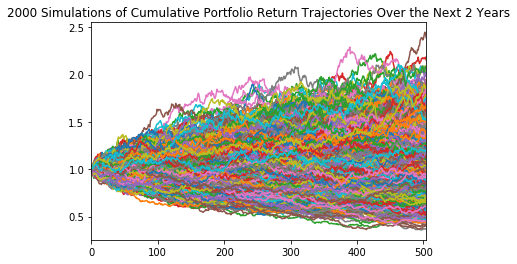

In [136]:
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 2 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

### MJ INDEX Monte Carlo simulation

In [ ]:
# Monte carlo for MJ index 500 simulations in 2 years

mj_sim_df= pd.DataFrame()

for n in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices_index = [mj_last_price]

    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        mj_sim_price = simulated_mj_prices_index[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        # Append the simulated price to the list
        simulated_mj_prices_index.append(mj_sim_price)
    
    # Create a DataFrame of the simulated prices
    #simulated_price_df = pd.DataFrame({
        #"Simulated MJ Prices": simulated_mj_prices
        #})

    # Print head of DataFrame
    mj_sim_df[f"Simulation {n+1}"]= pd.Series(simulated_mj_prices_index)
    mj_sim_df.to_csv("MJ_montecarlo_data")
mj_sim_df.head()

In [ ]:
print(std_dev_daily_return_mj)

In [ ]:
#Simulated stock price trajectory for MJ
plot_title_mj = f"{n+1} Simulations of MJ Cumulative Portfolio Return Trajectories Over the Next 2 Years"
mj_sim_df.plot(legend=None, title=plot_title)

In [ ]:
# Select the end of year for MJ simulation
simulated_end_yr1 = mj_sim_df.iloc[252, :]
simulated_end_yr1.head()

In [ ]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval_yr1 = simulated_end_yr1.quantile(q=[0.025, 0.975])
confidence_interval_yr1

In [ ]:
#Simulated returns at 1 year with 95% confidence interval
simulated_end_yr1.plot(kind='hist', title= "95% Confidence interval of MJ Index price at the end of 1 year", density=True, bins=25)
plt.axvline(confidence_interval_yr1.iloc[0], color='r')
plt.axvline(confidence_interval_yr1.iloc[1], color='r')

In [ ]:
# Select the end of year 2 for MJ simulation and confidence interval
simulated_end_yr2 = mj_sim_df.iloc[-1, :]
confidence_interval_yr2 = simulated_end_yr2.quantile(q=[0.025, 0.975])
simulated_end_yr2.plot(kind='hist', title= "95% Confidence interval of MJ Index price at the end of 2 years", density=True, bins=25)
plt.axvline(confidence_interval_yr2.iloc[0], color='r')
plt.axvline(confidence_interval_yr2.iloc[1], color='r')
#simulated_end_yr2.head()

In [ ]:
#Daily returs of simulated stock price
#simulated_mj_daily_returns = mj_sim_df.pct_change()
#simulated_mj_daily_returns.head()

In [ ]:
#cumulative returns of simulated MJ stock prices
#simulated_mj_cumulative_returns = (1 + mj_sim_df).cumprod()
#simulated_mj_cumulative_returns.head()


### Calculate the Cumulative Profits/Losses of Simulated Stock Prices for MJ Index

In [ ]:
# Multiply an initial investment of 10,000 by the cumulative returns of simulative stock prices to
# return the progression of cumulative returns in terms of money
#initial_investment = 10000
#cumulative_pnl = initial_investment * mj_sim_df
#cumulative_pnl.head()

In [ ]:
#cumulative_pnl.plot(figsize= (15,8), title= "Cumulative P&L of $10,000 invested in 10 years")

In [ ]:
std_dev_daily_return_mj = np.random.normal(scale=0.5, size=10000)
std_dev_daily_return_spy = np.random.normal(scale=1.0, size=10000)
std_dev_daily_return_smok = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "MJ Index": std_dev_daily_return_mj,
    "S&P 500": std_dev_daily_return_spy,
    "SMOK Index": std_dev_daily_return_smok
})

portfolio_std.plot.hist(stacked=True, bins=100)

In [3]:
weed_use_df= pd.read_csv("../group_project_1/data_files/weed_use_2017.csv")
weed_use_df.set_index('State')
#weed_use_df['18-25']= weed_use_df['18-25'].astype(str)



#piviz plotly

Order  Population  18-25   26+   18+
State                                                     
Alabama                   6      430500   0.26  0.08  0.11
Alaska                    7       63500   0.39  0.21  0.23
Arizona                   8      637200   0.30  0.12  0.14
Arkansas                  9      265200   0.27  0.10  0.13
California               10     3697900   0.37  0.15  0.18
Colorado                 11      492600   0.49  0.22  0.26
Connecticut              12      297600   0.45  0.12  0.16
Delaware                 13       78500   0.37  0.12  0.15
District of Columbia     14       64200   0.53  0.22  0.27
Florida                  15     1698300   0.36  0.11  0.14
Georgia                  16      908000   0.30  0.09  0.12
Hawaii                   17      100400   0.27  0.11  0.13
Idaho                    18      150200   0.28  0.10  0.13
Illinois                 19     1114500   0.35  0.10  0.14
Indiana                  20      593900   0.34  0.11  0.15
Iowa                     21      273500   0.31  0.08  0.12
Kansas                   22      263400   0.29  0.09  0.12
Kentucky                 23      377400   0.29  0.10  0.13
Louisiana                24      424700   0.29  0.10  0.12
Maine                    25       92500   0.46  0.19  0.22
Maryland                 26      500100   0.39  0.12  0.16
Massachusetts            27      568000   0.45  0.16  0.20
Michigan                 28      896700   0.38  0.13  0.17
Minnesota                29      463800   0.33  0.11  0.14
Mississippi              30      273400   0.27  0.09  0.11
Missouri                 31      510800   0.32  0.11  0.14
Montana                  32       95000   0.41  0.17  0.20
Nebraska                 33      167300   0.31  0.08  0.11
Nevada                   34      257000   0.36  0.14  0.17
New Hampshire            35      104700   0.43  0.15  0.19
New Jersey               36      734100   0.35  0.09  0.12
New Mexico               37      191500   0.34  0.15  0.18
New York                 38     1761000   0.36  0.11  0.15
North Carolina           39      847500   0.30  0.09  0.12
North Dakota             40       75100   0.25  0.08  0.11
Ohio                     41      987700   0.35  0.11  0.14
Oklahoma                 42      342600   0.29  0.09  0.12
Oregon                   43      343700   0.48  0.24  0.27
Pennsylvania             44     1028600   0.34  0.10  0.13
Rhode Island             45       94600   0.44  0.17  0.21
South Carolina           46      418700   0.28  0.08  0.11
South Dakota             47       72000   0.29  0.09  0.12
Tennessee                48      560900   0.32  0.11  0.14
Texas                    49     2612700   0.26  0.08  0.11
Utah                     50      325400   0.24  0.08  0.11
Vermont                  51       52500   0.50  0.20  0.24
Virginia                 52      717900   0.31  0.09  0.12
Washington               53      628700   0.42  0.20  0.23
West Virginia            54      148600   0.29  0.11  0.13
Wisconsin                55      495600   0.30  0.10  0.13
Wyoming                  56       48500   0.29  0.09  0.12

In [4]:
weed_use_df.drop(columns= ["Order","26+", "18+"], inplace=True)

In [5]:
weed_use_df['18-25']= weed_use_df['18-25'].astype(float)

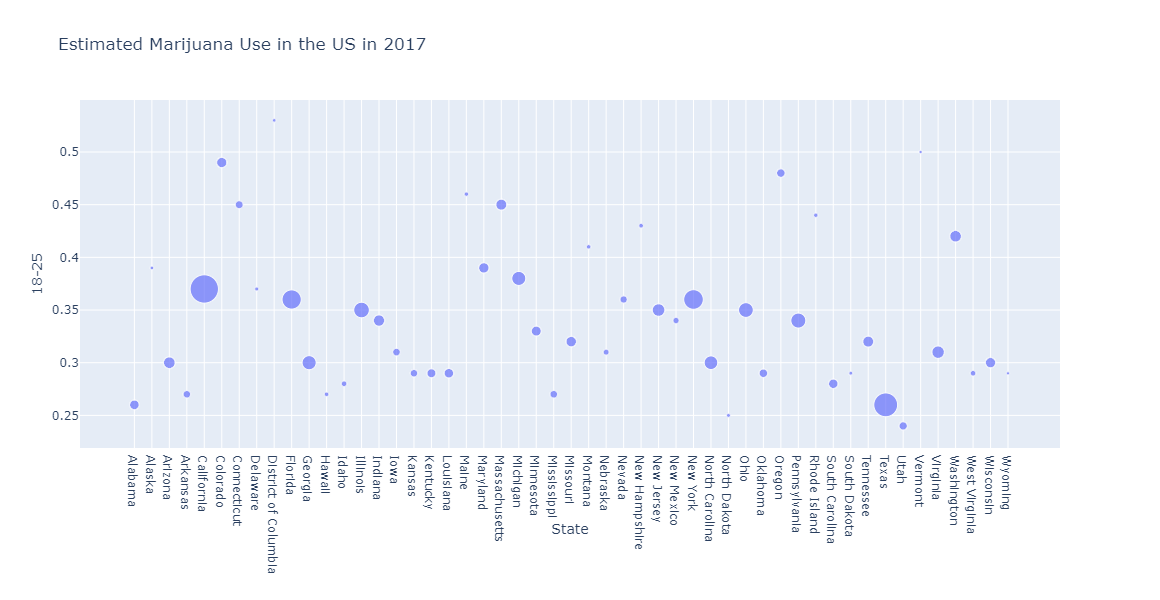

In [6]:
px.scatter(weed_use_df, x='State', y='18-25', size='Population', title="Estimated Marijuana Use in the US in 2017")
